In [72]:
import copy
import os
import argparse
from erasure.utils.logger import GLogger
import torch
import numpy as np
import random
import tracemalloc
from erasure.utils.config.local_ctx import Local
from erasure.utils.config.global_ctx import Global, bcolors 
from erasure.core.factory_base import ConfigurableFactory
from erasure.data.datasets.DatasetManager import DatasetManager
tracemalloc.start()
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
config_file = os.path.join("configs","ESSAI","1_fair_face_remove_race.jsonc")

In [74]:
global_ctx = Global(config_file)
global_ctx.factory = ConfigurableFactory(global_ctx)

#Create Dataset
data_manager = global_ctx.factory.get_object( Local( global_ctx.config.data ))
global_ctx.dataset = data_manager

2025-06-30 14:32:37,-1059899719 | INFO | 1999255 - Creating Global Context for: configs/ESSAI/1_fair_face_remove_race.jsonc
2025-06-30 14:32:37,-1059899636 | INFO | 1999255 - Setting seeds to: 0
2025-06-30 14:32:37,-1059899604 | INFO | 1999255 - Caching System: True.
2025-06-30 14:32:37,-1059899602 | INFO | 1999255 - Created Configurable: erasure.data.preprocessing.reshape_x_z.reshape_x_z
2025-06-30 14:32:37,-1059899574 | INFO | 1999255 - Created Configurable: erasure.data.preprocessing.image_to_tensor.ImageToTensorPreprocess
2025-06-30 14:32:37,-1059899543 | INFO | 1999255 - Created Configurable: erasure.data.data_sources.HFDataSource.HFDataSource
2025-06-30 14:32:37,-1059899512 | INFO | 1999255 - {'class': 'erasure.data.data_sources.HFDataSource.HFDataSource', 'parameters': {'path': 'HuggingFaceM4/FairFace', 'configuration': '0.25', 'data_columns': ['image', 'race', 'gender'], 'label': 'age', 'to_encode': ['age', 'race'], 'preprocess': [{'class': 'erasure.data.preprocessing.reshape_x

Filtering Data: 100%|██████████| 1/1 [00:24<00:00, 24.70s/it]

2025-06-30 14:33:05,-1059871446 | INFO | 1999255 - ['all', 'all_shuffled', '-', 'forget', 'other_ids_full']
2025-06-30 14:33:05,-1059871443 | INFO | 1999255 - Instantiating: erasure.data.datasets.DataSplitter.DataSplitterPercentage
2025-06-30 14:33:05,-1059871310 | INFO | 1999255 - ['all', 'all_shuffled', '-', 'forget', 'other_ids_full', 'other_ids']
2025-06-30 14:33:05,-1059871308 | INFO | 1999255 - Instantiating: erasure.data.datasets.DataSplitter.DataSplitterPercentage
2025-06-30 14:33:05,-1059871306 | INFO | 1999255 - ['all', 'all_shuffled', '-', 'forget', 'other_ids_full', 'other_ids', 'retain', 'test']
2025-06-30 14:33:05,-1059871304 | INFO | 1999255 - Instantiating: erasure.data.datasets.DataSplitter.DataSplitterConcat
2025-06-30 14:33:05,-1059871303 | INFO | 1999255 - ['all', 'all_shuffled', '-', 'forget', 'other_ids_full', 'other_ids', 'retain', 'test', 'train']
2025-06-30 14:33:05,-1059871302 | INFO | 1999255 - ['all', 'all_shuffled', '-', 'forget', 'other_ids_full', 'other_i

In [75]:
forget_loader,_ = data_manager.get_loader_for('forget')

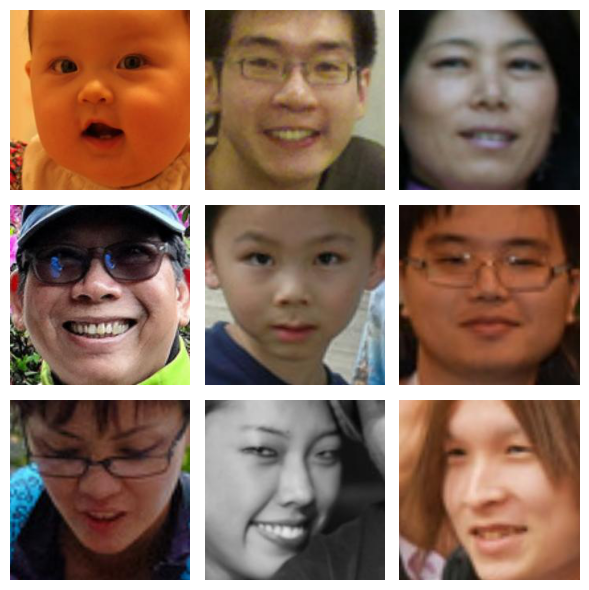

In [76]:
# Initialize an empty list to collect images
images = []

# Iterate through the loader until we collect 9 images
for batch in forget_loader:
    X = batch[0]  # assuming (X,y) or (X,y,z); adjust index if needed

    # If batch size >= remaining needed images, take only what's needed
    remaining = 9 - len(images)
    X = X[:remaining]

    images.extend(X)

    if len(images) >= 9:
        break

# Function to convert tensor to numpy/PIL for plotting
def tensor_to_numpy(img):
    if torch.is_tensor(img):
        img = img.detach().cpu()
        if len(img.shape) == 3 and img.shape[0] in [1,3]:
            img = F.to_pil_image(img)
    return img

images = [tensor_to_numpy(img) for img in images]

# Plot in a 3x3 grid
fig, axs = plt.subplots(3, 3, figsize=(6,6))

for i, ax in enumerate(axs.flat):
    ax.imshow(images[i])
    ax.axis('off')

plt.tight_layout()
plt.show()